In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
d1=pd.read_csv('train (5).csv')

In [3]:
d2=pd.read_csv('test (2).csv')

In [4]:
submission=pd.read_csv('gender_submission.csv')

In [5]:
d1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
d2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
d1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:>

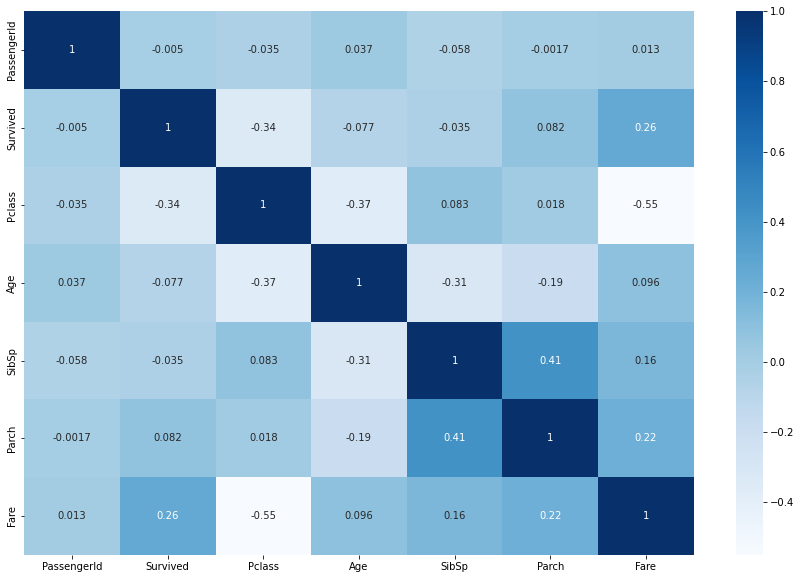

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(d1.corr(),annot=True,cmap='Blues')

In [9]:
d1=d1.drop(['Cabin'],axis=1)

In [10]:
d1=d1.drop(['Name'],axis=1)

In [11]:
d1.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [12]:
d1.size

8910

In [13]:
d2.size

4598

In [14]:
d1.shape

(891, 10)

In [15]:
d2.shape

(418, 11)

In [16]:
d1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [17]:
d1.Sex=d1.Sex.astype('category').cat.codes

In [18]:
d1.Ticket=d1.Ticket.astype('category').cat.codes

In [19]:
d1.Embarked=d1.Embarked.astype('category').cat.codes

In [20]:
d1.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex               int8
Age            float64
SibSp            int64
Parch            int64
Ticket           int16
Fare           float64
Embarked          int8
dtype: object

In [21]:
d1.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,1,22.0,1,0,523,7.2500,2
1,2,1,1,0,38.0,1,0,596,71.2833,0
2,3,1,3,0,26.0,0,0,669,7.9250,2
3,4,1,1,0,35.0,1,0,49,53.1000,2
4,5,0,3,1,35.0,0,0,472,8.0500,2


In [22]:
d2=d2.drop(['Cabin'],axis=1)

In [23]:
d2=d2.drop(['Name'],axis=1)

In [24]:
d2.Sex=d1.Sex.astype('category').cat.codes

In [25]:
d2.Ticket=d1.Ticket.astype('category').cat.codes

In [26]:
d2.Embarked=d1.Embarked.astype('category').cat.codes

In [27]:
d2.dtypes

PassengerId      int64
Pclass           int64
Sex               int8
Age            float64
SibSp            int64
Parch            int64
Ticket           int16
Fare           float64
Embarked          int8
dtype: object

In [28]:
d1.Age=d1.Age.fillna(d1.Age.median())

In [29]:
d1.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [30]:
d2.Age=d2.Age.fillna(d2.Age.median())

In [31]:
d2.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [32]:
d2.Fare=d2.Fare.fillna(d2.Fare.median())

In [33]:
d2.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

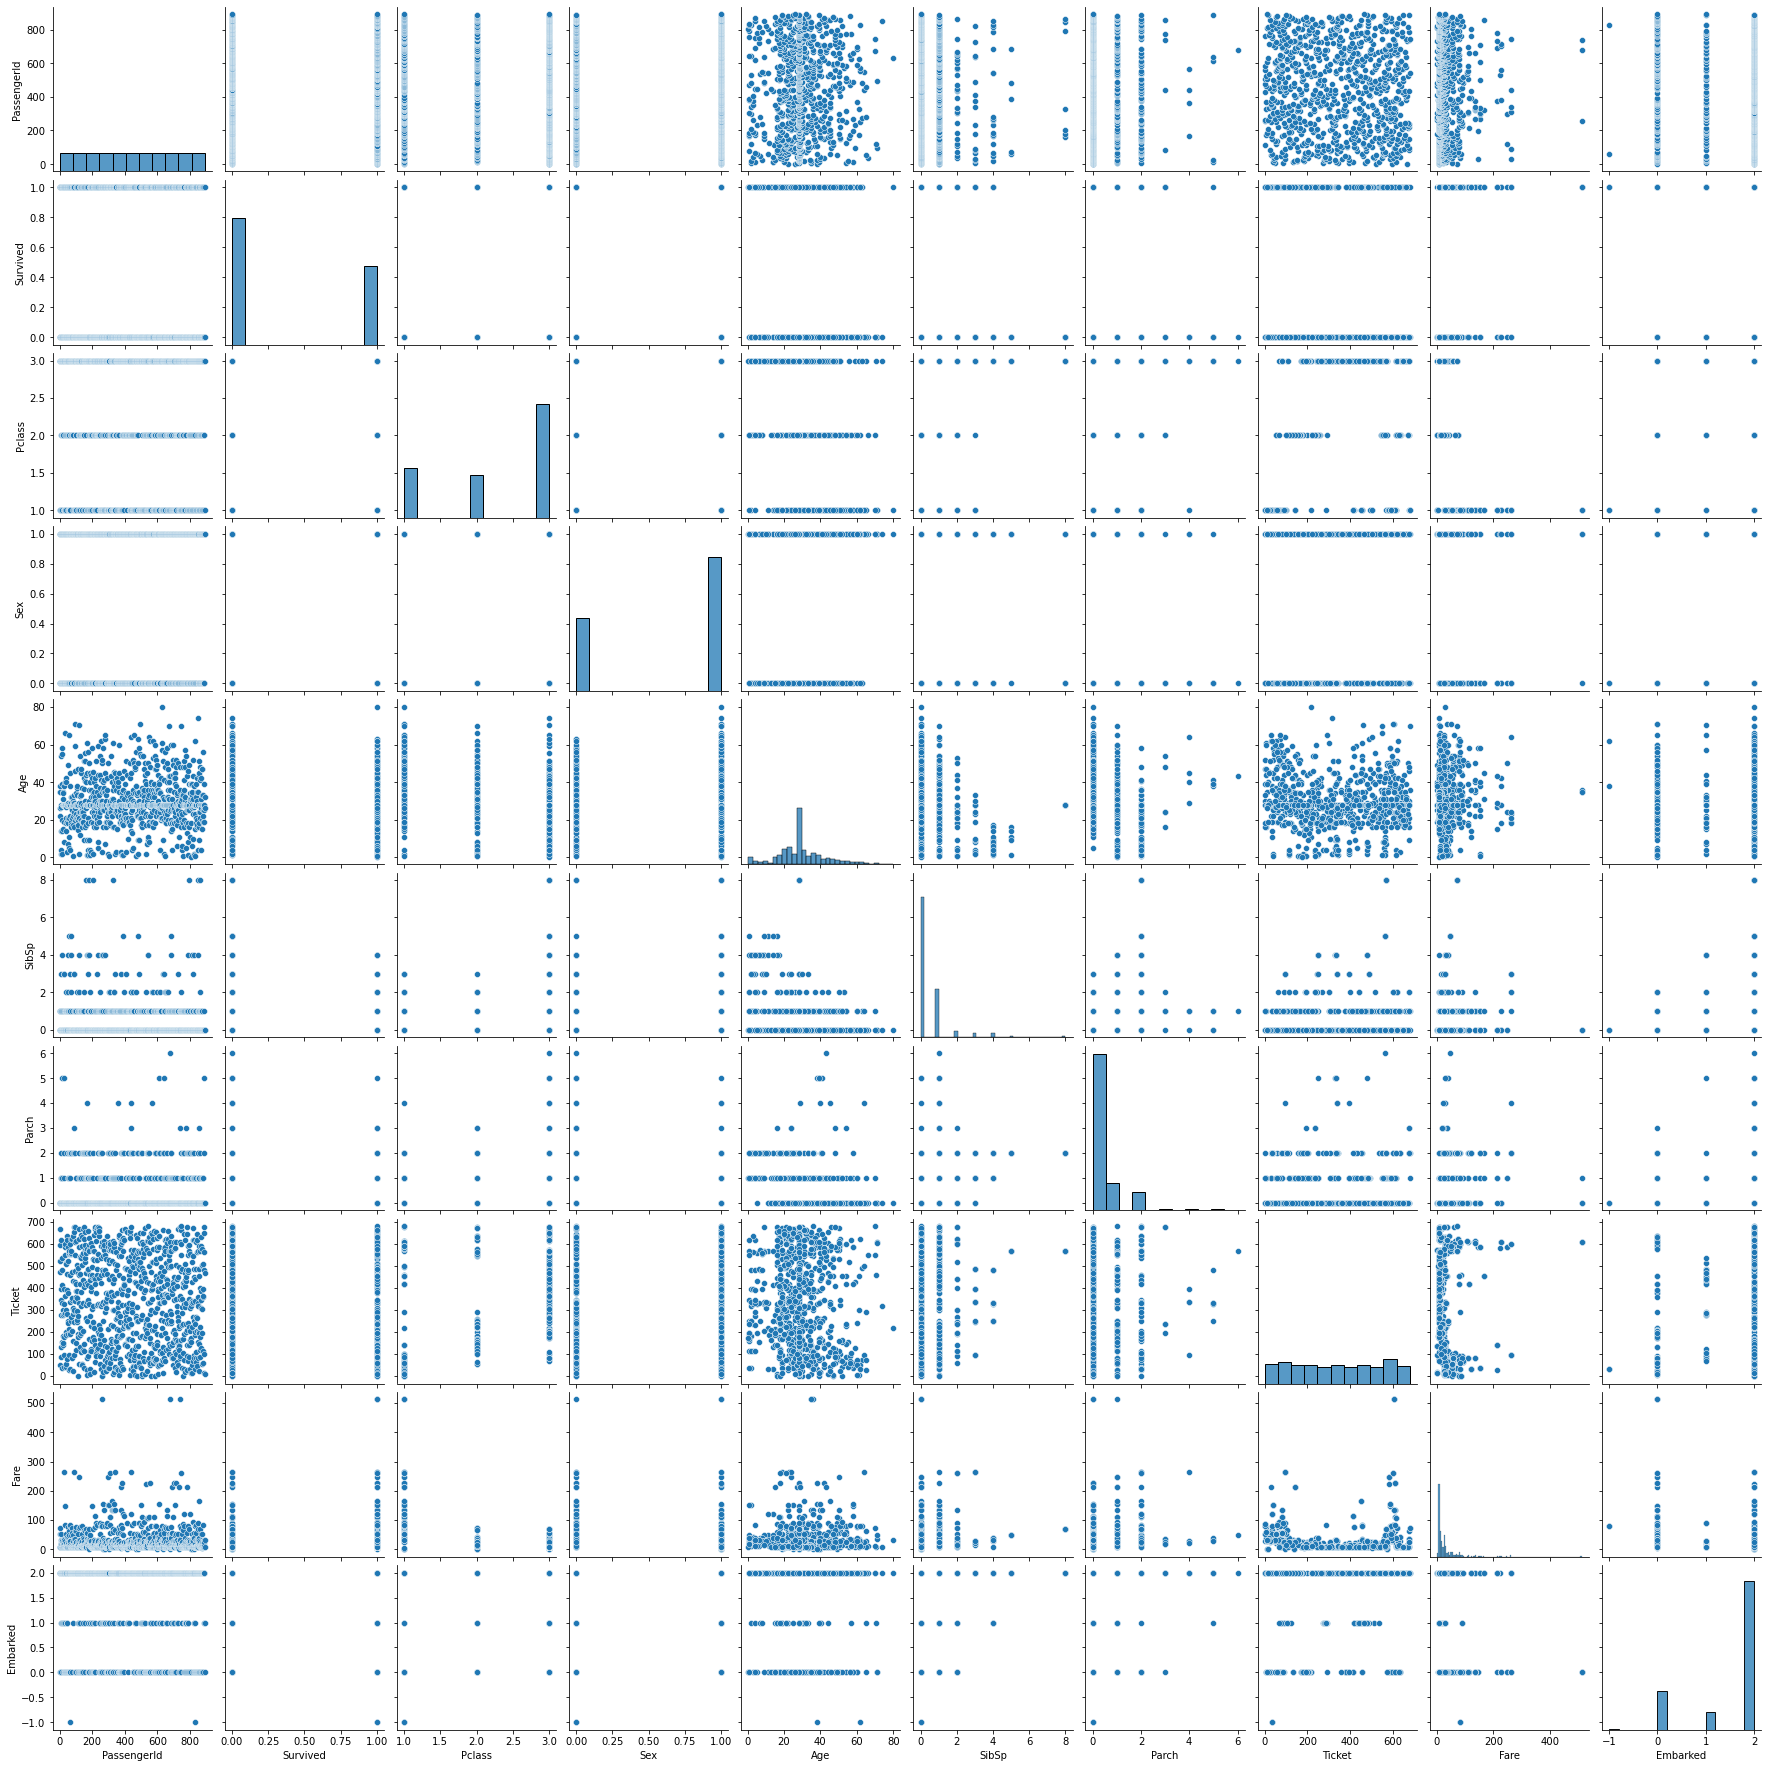

In [34]:
sns.pairplot(d1)

In [35]:
d2=d2.drop(['PassengerId'],axis=1)

In [36]:
d1=d1.drop(['PassengerId'],axis=1)

In [37]:
X=d1.drop(['Survived'],axis=1)
y=d1['Survived']

In [38]:
X.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Embarked'], dtype='object')

In [39]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
col_to_standard=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked']
X[col_to_standard]=scaler.fit_transform(X[col_to_standard])

In [40]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
col_to_standard=['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Embarked']
d2[col_to_standard]=scaler.fit_transform(d2[col_to_standard])

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

In [43]:
model=KNeighborsClassifier()

In [44]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [45]:
preds=model.predict(X_train)

In [46]:
len(preds)

712

In [47]:
from sklearn.metrics import classification_report,f1_score,accuracy_score

In [48]:
print(classification_report(y_train,preds))

              precision    recall  f1-score   support

           0       0.85      0.90      0.88       439
           1       0.83      0.74      0.78       273

    accuracy                           0.84       712
   macro avg       0.84      0.82      0.83       712
weighted avg       0.84      0.84      0.84       712



In [49]:
y_pred_valid = model.predict(X_valid)

In [50]:
print("Train Accuracy:",accuracy_score(y_train,preds))
print("valid Accuracy:",accuracy_score(y_valid,y_pred_valid))

Train Accuracy: 0.8412921348314607
valid Accuracy: 0.8435754189944135


In [51]:
preds_test=model.predict(d2)

In [52]:
preds_test

array([0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,

In [53]:
import csv
submission['Survived'] = preds_test
submission.to_csv('KNN_SUBMISSION.csv', index=False)
submission = pd.read_csv('KNN_SUBMISSION.csv')
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,1
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0
